# Interacting with the Data

Created by MCD (2024) for the Time-Domain Needles in Rubin's Haystacks, April 17-19th 2024. If you liked it or have comments/questions/concerns, please email Meg at megan.c.davis@uconn.edu.

### About the data...

The datasets for this hack have been provided as [HDF5](https://www.youtube.com/watch?v=S74Kc8QYDac) files. HDF5 files act (somewhat) like dictionaries and numpy arrays. They are also very efficient for storing large quantities of datasets (and half the size of a fits file containing the same information!).

These HDF5 files contain individual datasets. All of the files from the dataverse have at least 10 datasets, with the `_large.hdf5` file containing 30. Each dataset contains a 'time' column and then 1001 light curve columns labeled as '0', '1', '2', and so on. [Please download one of the files from the dataverse to run this example](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/G0IOPJ). They also contain important metadata about the light curves that we need for machine learning: a truth table for whether or not the light curve represents a binary (`True`) or single quasar (`False`).

Please install [h5py](https://docs.h5py.org/en/stable/quick.html#quick) and [astropy](https://www.astropy.org) if you don't already have them.

Let's begin by taking a look at the first dataset `data0` in whatever `lc_file` you have downloaded via Astropy Tables and also make a plot to visualize it.

In [1]:
from astropy.table import Table, Column
import h5py
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open via astropy table
lc_file = '../Hackathon_2024_lcs_DDF.hdf5' #change to your path for your downloaded dataset, whole example uses this

data = Table.read(lc_file, format='hdf5', path='data0') #read in the 'data0' dataset in the file

data #show the Table

time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,floa

Now what about our truth table?

In [3]:
#pull truth table
data.meta['truths']

array([False,  True, False, ..., False, False,  True])

Let's make a plot to visualize a single light curve, the first light curve `"0"` in `data0`.

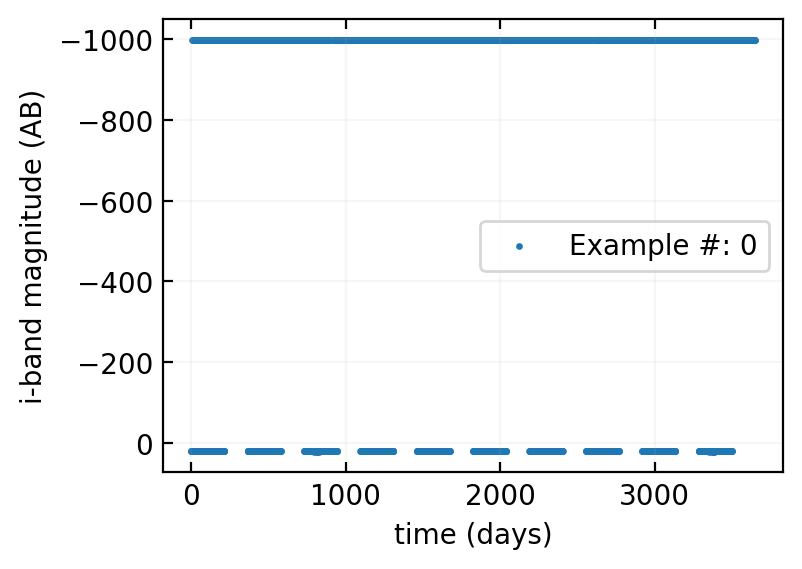

In [4]:
fontsize = 10

lc_label = '0' #our light curve choice

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=200)
ax.scatter(data['time'],data[lc_label], s=2 ,label = "Example #: {}".format(lc_label))

plt.gca().invert_yaxis() #don't forget, we're working with magnitudes!


#plot mods
ax.grid(True, alpha=0.1, zorder=10)
plt.legend()

#labels, titles, ticks
ax.set_xlabel("time (days)", fontsize=fontsize)
ax.set_ylabel("i-band magnitude (AB)", fontsize =fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize, 
               top=True, right=False, bottom=True, left=True, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=fontsize, 
               top=True, right=False, bottom=True, left=True, direction='in')

#Uncomment the following line if you want to save it
#plt.savefig("binaries_or_not_example_1.png", dpi =200, bbox_inches='tight', facecolor = "w")

That looks awful. Something to note: the description of the file on the dataverse says that we need to filter on -999.0, as that is the number that represents a non-observation for that night. You probably noticed them in the table. Let's make a mask and try plotting again. 

In [5]:
mask = (data['0'] > -900.)

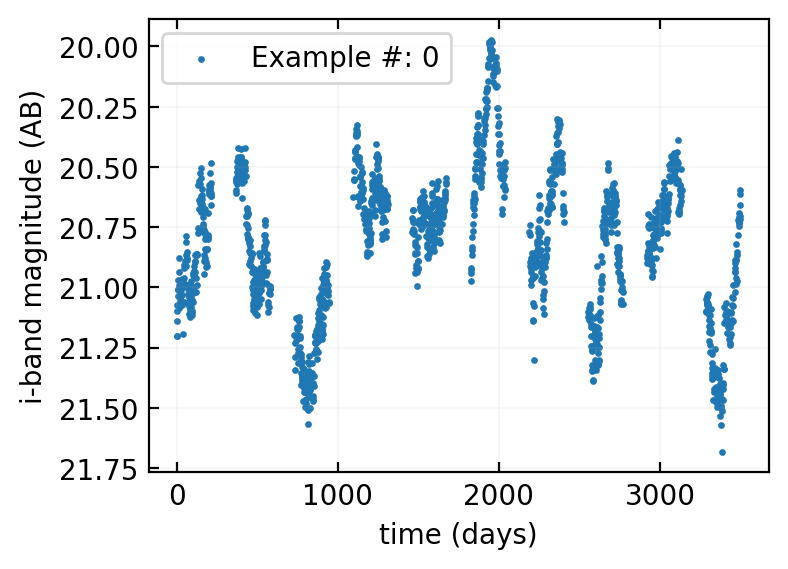

In [6]:
fontsize = 10

lc_label = '0'

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=200)
ax.scatter(data['time'][mask],data[lc_label][mask], s=2 ,label = "Example #: {}".format(lc_label)) #apply that mask!

plt.gca().invert_yaxis() #don't forget, we're working with magnitudes!


#plot mods
ax.grid(True, alpha=0.1, zorder=10)
plt.legend()

#labels, titles, ticks
ax.set_xlabel("time (days)", fontsize=fontsize)
ax.set_ylabel("i-band magnitude (AB)", fontsize =fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize, 
               top=True, right=False, bottom=True, left=True, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=fontsize, 
               top=True, right=False, bottom=True, left=True, direction='in')

#Uncomment the following line if you want to save it
#plt.savefig("binaries_or_not_example_2.png", dpi =200, bbox_inches='tight', facecolor = "w")

Nice light curve! Now, is that a binary or not?

In [7]:
data.meta['truths'][int(lc_label)]

False

## Accessing all of the datasets in a file

Astropy is a bit limited for opening all of the datasets in a single file. This is where h5py can come in handy. Let's open the file in h5py and inspect the keys.

In [8]:
f = h5py.File(lc_file, 'r')

print(f.keys())

<KeysViewHDF5 ['data0', 'data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8', 'data9']>


There they are! and we can access the column names for `data0`, for example, like this:

In [9]:
f['data0'].dtype.descr

[('time', '<f4'),
 ('0', '<f4'),
 ('1', '<f4'),
 ('2', '<f4'),
 ('3', '<f4'),
 ('4', '<f4'),
 ('5', '<f4'),
 ('6', '<f4'),
 ('7', '<f4'),
 ('8', '<f4'),
 ('9', '<f4'),
 ('10', '<f4'),
 ('11', '<f4'),
 ('12', '<f4'),
 ('13', '<f4'),
 ('14', '<f4'),
 ('15', '<f4'),
 ('16', '<f4'),
 ('17', '<f4'),
 ('18', '<f4'),
 ('19', '<f4'),
 ('20', '<f4'),
 ('21', '<f4'),
 ('22', '<f4'),
 ('23', '<f4'),
 ('24', '<f4'),
 ('25', '<f4'),
 ('26', '<f4'),
 ('27', '<f4'),
 ('28', '<f4'),
 ('29', '<f4'),
 ('30', '<f4'),
 ('31', '<f4'),
 ('32', '<f4'),
 ('33', '<f4'),
 ('34', '<f4'),
 ('35', '<f4'),
 ('36', '<f4'),
 ('37', '<f4'),
 ('38', '<f4'),
 ('39', '<f4'),
 ('40', '<f4'),
 ('41', '<f4'),
 ('42', '<f4'),
 ('43', '<f4'),
 ('44', '<f4'),
 ('45', '<f4'),
 ('46', '<f4'),
 ('47', '<f4'),
 ('48', '<f4'),
 ('49', '<f4'),
 ('50', '<f4'),
 ('51', '<f4'),
 ('52', '<f4'),
 ('53', '<f4'),
 ('54', '<f4'),
 ('55', '<f4'),
 ('56', '<f4'),
 ('57', '<f4'),
 ('58', '<f4'),
 ('59', '<f4'),
 ('60', '<f4'),
 ('61', '<f4'),


The following function can open and collect our data (and metadata!) from all of the datasets in a single HDF5 file and store what we need in two dictionaries: `truths` and `data`.

In [10]:
def read_hdf5_file(filename):
    truths = {} #extract the meta data! Our binary or not truths live here
    data = {} #extract the datasets, put their lightcurves here
    
    f = h5py.File(filename, 'r')
    
    for key in f.keys():
        #truths first
        for item in f[key].attrs:
            truths[key] = f[key].attrs[item]
        
        #extract LCs
        lcs = {}
        for i in range(len(f[key].dtype.descr)):
            lcs[f[key].dtype.descr[i][0]] = f[key][f[key].dtype.descr[i][0]]

        data[key] = lcs

    return data, truths

In [11]:
%%time
#it should take around 10 minutes for the smaller files with 10 datasets, depends on your computer
data, truths = read_hdf5_file(lc_file)

CPU times: user 9min 31s, sys: 19.1 s, total: 9min 50s
Wall time: 9min 51s


To give insight into the structure of the dictionaries we just made, here are the keys for `truths` and `data`:

In [12]:
print("Truth keys: ", truths.keys())
print("Data keys: ", data.keys())

Truth keys:  dict_keys(['data0', 'data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8', 'data9'])
Data keys:  dict_keys(['data0', 'data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8', 'data9'])


The `data` dictionary is actually a nested dictionary! Let's see the keys for `data['data0']`, they should be the light curve numbers and the same as the column names we saw in the Astropy Table above:

In [13]:
print(data['data0'].keys())

dict_keys(['time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155',

Now that we have the data loaded and dumped into dictionaries, let's remake the above plot.

In [14]:
#from the description of the files on the dataverse:
#a -999 means no observation that day, let's filter that out via a mask again.

mask = (data['data0']['0'] > -900.)

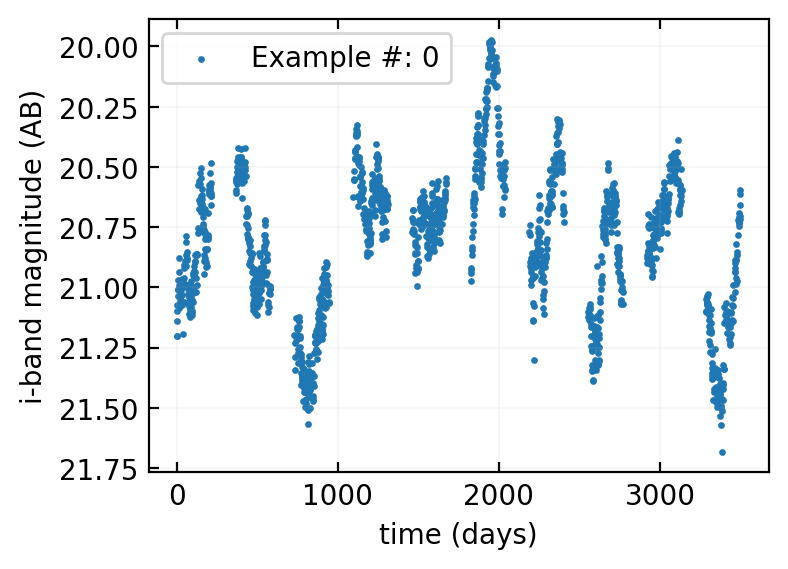

In [15]:
#let's plot
fontsize = 10

lc_label = '0'

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=200)
ax.scatter(data['data0']['time'][mask],data['data0'][lc_label][mask], s=2 ,label = "Example #: {}".format(lc_label))
plt.gca().invert_yaxis() #don't forget, we're working with magnitudes!

#plot mods
ax.grid(True, alpha=0.1, zorder=10)
plt.legend()

#labels, titles, ticks
ax.set_xlabel("time (days)", fontsize=fontsize)
ax.set_ylabel("i-band magnitude (AB)", fontsize =fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize, 
               top=True, right=False, bottom=True, left=True, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=fontsize, 
               top=True, right=False, bottom=True, left=True, direction='in')

#Uncomment the following line if you want to save it
#plt.savefig("binaries_or_not_example_3.png", dpi =200, bbox_inches='tight', facecolor = "w")

Cool! It should look the same as above unless I led you astray! Feel free to tear this notebook apart and explore the files on your own too! Good luck and clear skies!

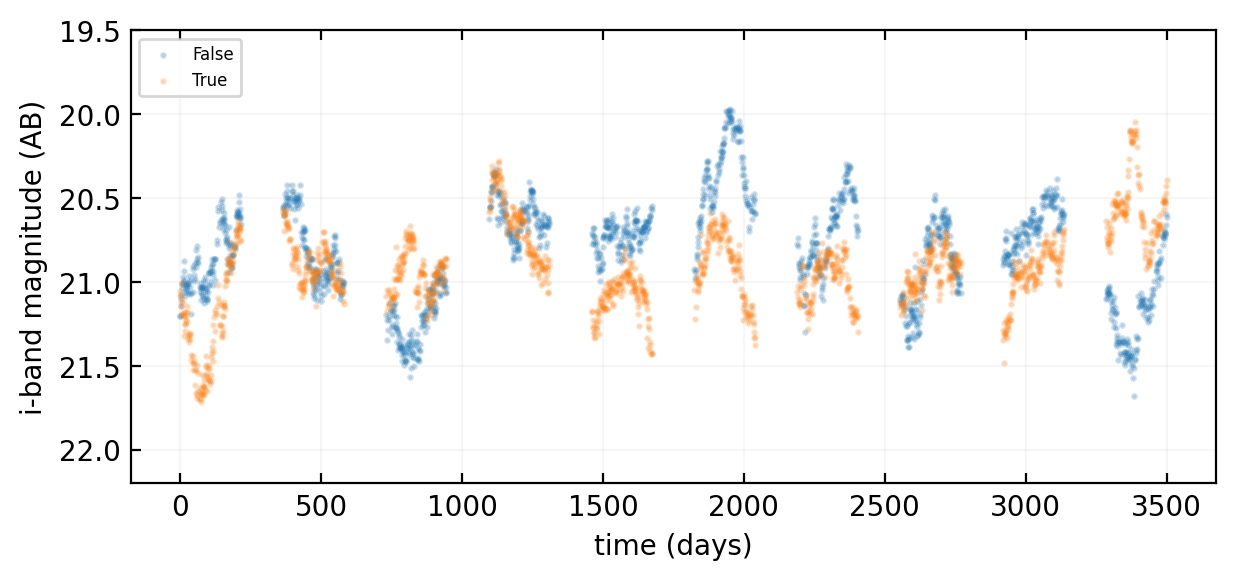

In [23]:
#let's plot multiple examples on one plot and put the binary truth in the label
#can you tell a difference?
fontsize = 10

fig, ax = plt.subplots(1, 1, figsize=(7, 3), dpi=200)

for i in range(2):
    mask = (data['data0'][str(i)] > -900.)
    ax.scatter(data['data0']['time'][mask],data['data0'][str(i)][mask], s=2 ,\
               alpha=0.2, label = str(truths['data0'][i]))
    
    #plot mods
    ax.grid(True, alpha=0.1, zorder=10)
    plt.legend(fontsize=fontsize-4, loc='upper left')
    ax.set_ylim(19.5, 22.2)
    plt.gca().invert_yaxis() #don't forget, we're working with magnitudes!

    #labels, titles, ticks
    ax.set_xlabel("time (days)", fontsize=fontsize)
    ax.set_ylabel("i-band magnitude (AB)", fontsize =fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize, 
                   top=True, right=False, bottom=True, left=True, direction='in')
    ax.tick_params(axis='both', which='minor', labelsize=fontsize, 
                   top=True, right=False, bottom=True, left=True, direction='in')

    #Uncomment the following line if you want to save it
    #plt.savefig("binaries_or_not_example_4.png", dpi =200, bbox_inches='tight', facecolor = "w")

In [16]:
#Cells provided for your exploration.


In [17]:
#add more if you need more!
